In [1]:
from pathlib import Path
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import string

#own modules
from evaluation.utils import db, tools
from evaluation.processing import tools_ec
from evaluation.visualization import plot
con = db.connect()
'done'

Could not find database file nor zip-archive. The database file should be located at $home$/database/sqlite.db


'done'

# Data

In [2]:
exp_ec, data_ec, exp_icpms, data_icpms, data_stability \
        = db.get_exp_sfc_icpms(sql_ec='''SELECT *
                                         FROM exp_ec_expanded
                                         WHERE name_user = "n.roettcher"
                                             AND DATE(t_start__timestamp) IN ("2024-03-26","2024-04-03","2024-04-04")
                                             AND comment = 'act+SGEIS'
                                             AND name_setup_sfc_alias = "Sandwitch"
                                             AND id_sample = 179 # equals loading__mg_Ir_cm2 > 1.6 but loading is added later
                                             AND id_ML_technique IN (2, 3, 4) # activation techniques
                                             ;''',
                               add_data_stability_analysis=True,  
                               add_gravimetric=True
                              )
exp_ec.loc[exp_ec.fe_bottom_id_pump_out == 2, 'icpms_location'] = 'top'
exp_ec.loc[exp_ec.fe_bottom_id_pump_out == 3, 'icpms_location'] = 'bottom'




Link selected experiments to PublicationExport:  HTE09_hCCM_setup
 For table exp_sfc : inserted new experiments = 0 , skipped existing experiments = 12 
SELECT id_exp_sfc, t_start__timestamp,t_end__timestamp, id_exp_icpms, spots_spot_size__mm2, fc_top_name_flow_cell_A_opening_ideal__mm2, fc_top_name_flow_cell_A_opening_real__mm2, fc_top_id_sealing_A_opening__mm2, fc_top_id_PTL_A_PTL__mm2, fc_bottom_name_flow_cell_A_opening_ideal__mm2, fc_bottom_name_flow_cell_A_opening_real__mm2, fc_bottom_id_sealing_A_opening__mm2, fc_bottom_id_PTL_A_PTL__mm2  FROM match_exp_sfc_exp_icpms m   
           WHERE (id_exp_sfc)   IN (13352, 13353, 13354, 12858, 12859, 12860, 13035, 13036, 13037, 13410, 13411, 13412);
Read data from "exp_icpms_sfc_expanded" ...
SELECT * FROM exp_icpms_sfc_expanded WHERE (`id_exp_icpms`) IN (709, 737);
Done in  0:00:00.021620
Link selected experiments to PublicationExport:  HTE09_hCCM_setup
 For table exp_icpms_analyte_internalstandard : inserted new experiments = 0 , skippe

/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/processing/tools_ec.py:964: UserWarning: Column: "j__mA_cm2geo_active_chosen" not available in data_ec. Will be skipped.
  warnings.warn(f'Column: "{col}" not available in data_ec. Will be skipped.')


# fig:dissolution_profile_top_bottom_activation

SELECT id_exp_sfc, t_start__timestamp,t_end__timestamp, id_exp_icpms, spots_spot_size__mm2  FROM match_exp_sfc_exp_icpms m   
           WHERE (id_exp_sfc)   IN (13352, 13353, 13354, 12858, 12859, 12860, 13035, 13036, 13037, 13410, 13411, 13412);
Added snychronized timestamp column:  Timestamp_synchronized__s
Added snychronized timestamp column:  t_delaycorrected__timestamp_sfc_pc_synchronized__s
 green: A single value per group. 
 orange: Different values within the group --> stored as list. 


,icpms_location,id_spot,id_exp_sfc,name_user,name_setup_sfc,name_setup_sfc_alias,name_setup_sfc_feature,name_setup_sfc_type,t_start__timestamp,t_end__timestamp,rawdata_path,rawdata_computer,id_ML,id_ML_technique,force__N,linaxis_x__mm,linaxis_y__mm,linaxis_z__mm,T_stage__degC,interrupted,labview_sfc_version,db_version,comment,ec_name_technique,ec_R_u__ohm,ec_iR_corr_in_situ__percent,ec_R_u_postdetermined__ohm,ec_R_u_determining_exp_ec,ec_R_u_determining_updated,ec_E_RE__VvsRHE,ec_name_RE,ec_name_RE_material,ec_name_RE_manufacturer,ec_name_RE_model,ec_name_CE,ec_name_CE_material,ec_name_CE_manufacturer,ec_name_CE_model,ec_name_CE_comment,ec_name_device,ec_id_control_mode,ec_id_ie_range,ec_id_vch_range,ec_id_ich_range,ec_id_vch_filter,ec_id_ich_filter,ec_id_ca_speed,ec_id_ie_stability,ec_id_sampling_mode,ec_ie_range_auto,ec_vch_range_auto,ec_ich_range_auto,samples_id_sample,samples_name_sample,samples_name_user,samples_t_manufactured__timestamp,samples_comment,samples_total_loading__mg_cm2,spots_id_spot,spots_spot_size__mm2,spots_pos_x__mm,spots_pos_y__mm,spots_comment,spots_total_loading__mg_cm2,spots_m_CL__mg,spots_m_Decal_plus_CL__mg,spots_m_Decal__mg,cv_name_technique,cv_E_initial__VvsRE,cv_E_apex1__VvsRE,cv_E_apex2__VvsRE,cv_E_final__VvsRE,cv_scanrate__mV_s,cv_stepsize__mV,cv_cycles,cv_E_initial__VvsOCP,cv_E_apex1__VvsOCP,cv_E_apex2__VvsOCP,cv_E_final__VvsOCP,geis_name_technique,geis_f_initial__Hz,geis_f_final__Hz,geis_I_dc__A,geis_I_amplitude__A,geis_R_initialguess__ohm,geis_points_per_decade,ghold_name_technique,ghold_I_hold__A,ghold_t_hold__s,ghold_t_samplerate__s,gpulse_name_technique,gpulse_I_hold1__A,gpulse_I_hold2__A,gpulse_t_hold1__s,gpulse_t_hold2__s,gpulse_t_samplerate__s,gpulse_cycles,ocp_name_technique,ocp_t_hold__s,ocp_t_samplerate__s,peis_name_technique,peis_f_initial__Hz,peis_f_final__Hz,peis_E_dc__VvsRE,peis_E_amplitude__VvsRE,peis_R_initialguess__ohm,peis_points_per_decade,peis_E_dc__VvsOCP,phold_name_technique,phold_E_hold__VvsRE,phold_t_hold__s,phold_t_samplerate__s,phold_E_hold__VvsOCP,ppulse_name_technique,ppulse_E_hold1__VvsRE,ppulse_E_hold2__VvsRE,ppulse_t_hold1__s,ppulse_t_hold2__s,ppulse_t_samplerate__s,ppulse_cycles,ppulse_E_hold1__VvsOCP,ppulse_E_hold2__VvsOCP,ramp_name_technique,ramp_E_initial__VvsRE,ramp_E_final__VvsRE,ramp_scanrate__mV_s,ramp_stepsize__mV,ramp_cycles,ramp_E_initial__VvsOCP,ramp_E_final__VvsOCP,fc_top_name_flow_cell,fc_top_name_flow_cell_name_user,fc_top_name_flow_cell_material,fc_top_name_flow_cell_A_opening_ideal__mm2,fc_top_name_flow_cell_A_opening_real__mm2,fc_top_name_flow_cell_manufacture_date,fc_top_name_flow_cell_CAD_file,fc_top_name_flow_cell_opening_shape,fc_top_name_flow_cell_comment,fc_top_id_sealing,fc_top_id_sealing_name_user,fc_top_id_sealing_material,fc_top_id_sealing_A_sealing__mm2,fc_top_id_sealing_A_opening__mm2,fc_top_id_sealing_thickness__mm,fc_top_id_sealing_shaping_method,fc_top_id_sealing_comment,fc_top_id_PTL,fc_top_id_PTL_name_user,fc_top_id_PTL_material,fc_top_id_PTL_thickness__mm,fc_top_id_PTL_manufacturer,fc_top_id_PTL_A_PTL__mm2,fc_top_id_PTL_shaping_method,fc_top_id_PTL_comment,fc_bottom_name_flow_cell,fc_bottom_name_flow_cell_name_user,fc_bottom_name_flow_cell_material,fc_bottom_name_flow_cell_A_opening_ideal__mm2,fc_bottom_name_flow_cell_A_opening_real__mm2,fc_bottom_name_flow_cell_manufacture_date,fc_bottom_name_flow_cell_CAD_file,fc_bottom_name_flow_cell_opening_shape,fc_bottom_name_flow_cell_comment,fc_bottom_id_sealing,fc_bottom_id_sealing_name_user,fc_bottom_id_sealing_material,fc_bottom_id_sealing_A_sealing__mm2,fc_bottom_id_sealing_A_opening__mm2,fc_bottom_id_sealing_thickness__mm,fc_bottom_id_sealing_shaping_method,fc_bottom_id_sealing_comment,fc_bottom_id_PTL,fc_bottom_id_PTL_name_user,fc_bottom_id_PTL_material,fc_bottom_id_PTL_thickness__mm,fc_bottom_id_PTL_manufacturer,fc_bottom_id_PTL_A_PTL__mm2,fc_bottom_id_PTL_shaping_method,fc_bottom_id_PTL_comment,fe_top_id_pump_in,fe_top_id_pump_in_manufacturer,fe_top_id_pump_in_model,fe_top_id_p

 green: A single value per group. 
 orange: Different values within the group --> stored as list. 


 green: A single value per group. 
 orange: Different values within the group --> stored as list. 


/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/visualization/plot.py:2052: UserWarning: y-axis label is overwritten from $j_\mathrm{geo}$ / mA cm$_{(\mathrm{bottom\ PTL})}^{-2}$ to j__mA_cm2geo_fc_bottom_PTL_min
  warnings.warn(
/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/visualization/plot.py:2052: UserWarning: y-axis label is overwritten from d$m$ d$t^{-1}$ $S^{-1}$ / ng s$^{-1}$ cm$^{-2}_{\mathrm{(PTL)}}$ to dm_dt_S__ng_s_cm2geo_fc_bottom_PTL_min
  warnings.warn(
/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/visualization/plot.py:2052: UserWarning: y-axis label is overwritten from d$m$ d$t^{-1}$ $S^{-1}$ / ng s$^{-1}$ cm$^{-2}_{\mathrm{(PTL)}}$ to dm_dt_S__ng_s_cm2geo_fc_bottom_PTL_min
  warnings.warn(
/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/visualization/plot.py:2052: UserWarning: y-axis label is overwritten from dm_dt_S__ng_s_cm2geo_fc_bottom_PTL_min to d$m$ d$t^{-1}$ $S^{-1}$ / ng s$^{-1}$ cm$^{-2}_{\mathrm{(PTL)}}$
 

AxesSubplot(0.2,0.133333;0.775x0.271739)
AxesSubplot(0.2,0.41413;0.775x0.271739)
 Plot  fig_dis_pro_top_bottom_act.pdf  successfully saved 
![[Binder_export/Figures/Fig_4/fig_dis_pro_top_bottom_act.pdf]] <br> *jupyter notebook source:* ![[Binder_export/Figures/Fig_4/$$dummy_replaced_by_obsidian_jupyter$$]]


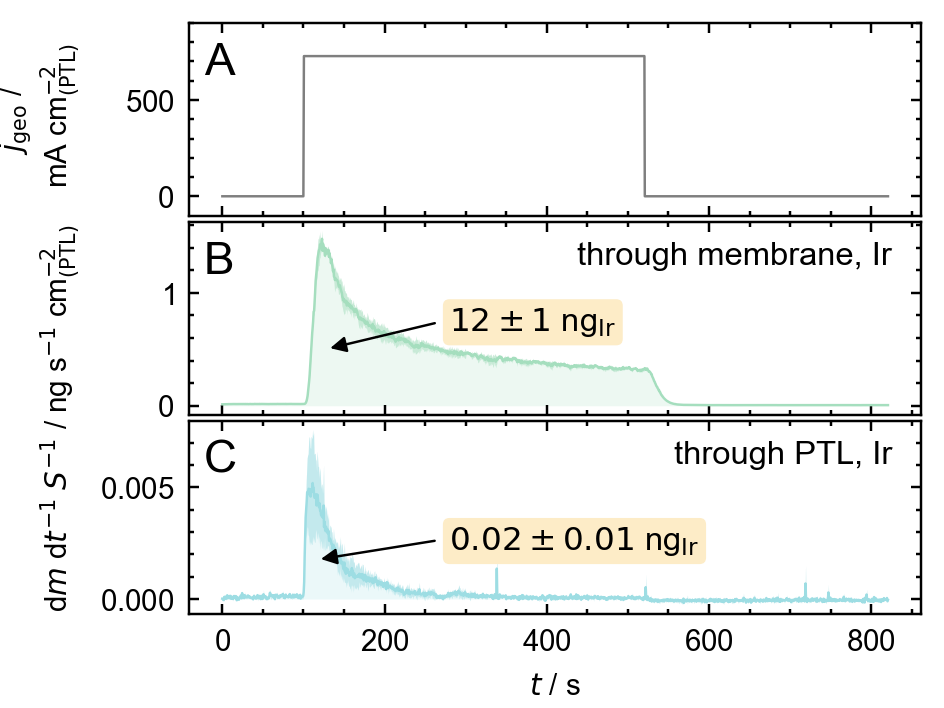

In [3]:
plot_name='fig_dis_pro_top_bottom_act'
average_cols_icpms=['name_isotope_analyte', 'name_isotope_internalstandard', 'id_sample', 'icpms_location']  # 
average_cols_ec=['id_sample',] 
average_cols_both=['id_sample', 'icpms_location']
overlay_index_cols = ['id_spot',] 
overlay_cols=average_cols_both+overlay_index_cols
cols_ec_to_icpms=['loading__mg_Ir_cm2']


exp_icpms = exp_icpms.loc[exp_icpms.index.get_level_values('name_isotope_analyte')=='Ir193', :]




exp_ec_overlay, data_ec_overlay, exp_icpms_overlay, data_icpms_overlay  \
        = db.overlay_exp_sfc_icpms(exp_ec, data_ec, exp_icpms, data_icpms,
                                   overlay_cols=overlay_cols,
                                   cols_ec_to_icpms=cols_ec_to_icpms
                                  )

## correct time sync for length of first technique (different for different MLs)
first_exp_ec_technique = exp_ec_overlay.groupby(overlay_cols).first()
time_diff_first_exp_ec_technique= first_exp_ec_technique.t_end__timestamp - first_exp_ec_technique.t_start__timestamp
time_correct_exp_ec = time_diff_first_exp_ec_technique - time_diff_first_exp_ec_technique.min()
time_correct_exp_ec.name='Timestamp_correction__timediff'
data_ec_overlay.loc[:, 'Timestamp_synchronized_corrected__s'] = data_ec_overlay.Timestamp_synchronized__s - data_ec_overlay.join(time_correct_exp_ec, ).Timestamp_correction__timediff.dt.seconds
data_icpms_overlay.loc[:, 't_delaycorrected__timestamp_sfc_pc_synchronized_corrected__s'] = data_icpms_overlay.t_delaycorrected__timestamp_sfc_pc_synchronized__s - data_icpms_overlay.join(time_correct_exp_ec, ).Timestamp_correction__timediff.dt.seconds

## transform units
data_icpms_overlay.loc[:, 'dm_dt__pg_s'] = data_icpms_overlay.dm_dt__ng_s *1000


## remove specific ec technique, but keep ICP-MS technique (bubble makes arrtifact in EC but not in ICP-MS)
exp_ec_overlay = exp_ec_overlay.loc[ ~(exp_ec_overlay.index.get_level_values('id_spot').isin([10]))]
data_ec_overlay = data_ec_overlay.loc[data_ec_overlay.reset_index(level=-1).index.isin(exp_ec_overlay.index)]


exp_ec_overlay_avg, data_ec_overlay_avg = plot.average(exp_ec_overlay,
                                                        data_ec_overlay, 
                                                       on=average_cols_ec,
                                                        overlay_index_cols=overlay_index_cols
                                                       )

exp_icpms_overlay_avg, data_icpms_overlay_avg = plot.average(exp_icpms_overlay,
                                                        data_icpms_overlay, 
                                                        on=average_cols_icpms,
                                                        overlay_index_cols=overlay_index_cols
                                                       )

# data stability rearrangements
averaged_cols = ['m_dissolved_trapz__ng']
data_stability.loc[:, 'icpms_location'] = data_stability.location
data_stability_avg = plot.aggregate_list_unique(data_stability, on=average_cols_icpms)\
                                    .drop(columns=averaged_cols)\
                                    .join(data_stability.groupby(average_cols_icpms)[averaged_cols].mean()\
                                    .join(data_stability.groupby(average_cols_icpms)[averaged_cols].min(), rsuffix='_min')\
                                    .join(data_stability.groupby(average_cols_icpms)[averaged_cols].max(), rsuffix='_max')\
                                    .join(data_stability.groupby(average_cols_icpms)[averaged_cols].std(), rsuffix='_std')
                                         )
data_stability_avg.loc[:, 'm_dissolved_trapz__ng_round_significant'] = tools.round_significant_digits_df(data_stability_avg, 
                                                                                                             col_value = 'm_dissolved_trapz__ng',
                                                                                                             col_error = 'm_dissolved_trapz__ng_std', 
                                                                                                             return_type='str'
                                                                                                            )
exp_icpms_overlay_avg.loc[:, 'm_dissolved_trapz__ng_round_significant'] = data_stability_avg.loc[:, 'm_dissolved_trapz__ng_round_significant']



plot.manual_col_to_axis_label['dm_dt_S__ng_s_cm2geo_fc_bottom_PTL'] = 'd$m$ d$t^{-1}$ $S^{-1}$ / ng s$^{-1}$ cm$^{-2}_{\mathrm{(PTL)}}$'


icpms_y_col = 'dm_dt_S__ng_s_cm2geo_fc_bottom_PTL'
icpms_x_col='t_delaycorrected__timestamp_sfc_pc_synchronized_corrected__s'


with plt.rc_context(plot.get_style(style='singleColumn',
                                  increase_fig_height=1.2,
                                   add_margins= {'left': 0.6,},
                                  interactive =True,)):
    plot_storage = plot.PlotDataStorage(plot_name, overwrite_existing=True)

    fig = plt.figure()
    gs = gridspec.GridSpec(3, 1)
    ax1 = fig.add_subplot(gs[0, 0])
    
    
    ax3_4 = fig.add_subplot(gs[1:3, 0])
    ax3_4.patch.set_alpha(0)
    for spine in ['top', 'right', 'bottom', 'left']:
        ax3_4.spines[spine].set_visible(False)
    ax3_4.set_xticks([])
    ax3_4.set_yticks([])  
    
    ax3 = fig.add_subplot(gs[1, 0], sharex=ax1)
    ax4 = fig.add_subplot(gs[2, 0], sharex=ax1)

    axs = [ax1,ax3,ax4,]

    #Hide xaxis label on ax
    plt.setp(ax1.get_xticklabels(), visible=False)


    overlay_cols=['id_sample', 'icpms_location']
    df_color = exp_ec_overlay.reset_index().loc[:, overlay_cols].drop_duplicates() 

    df_color = df_color.dataset.add_column('color', 
                                            rowindexers=[                                                             
                                                        ((df_color.id_sample == 179) & (df_color.icpms_location == 'top')),
                                                        ((df_color.id_sample == 179) & (df_color.icpms_location == 'bottom')),
                                                        (df_color.id_sample == 180),
                                                         (df_color.id_sample == 181),
                                                        ],
                                            values=['#a5debeff', 
                                                    '#9ddde3ff',
                                                    'Purples', 
                                                    'YlOrBr'],
                                       cmap_min=0.3, cmap_max=0.7,)\
                                    .return_dataset()\
                                    .set_index(overlay_cols).loc[:, ['color', ]]

  

    exp_ec_overlay_avg = exp_ec_overlay_avg\
                    .dataset\
    .add_column('color', 
                                 values='tab:grey',  cmap_min=0.3, cmap_max=0.7,
                                )\
                    .add_column('label', 
                                 values=exp_ec_overlay_avg.loading__mg_Ir_cm2.apply(lambda x: '{0:.1f}'.format(x)).astype(str)+' mg$_{\mathrm{Ir}}$ cm$^{-2}$',
                                rowindexer_first_of_group='id_sample', 
                                )\
                    .plot(x_col='Timestamp_synchronized_corrected__s',
                         y_col='j__mA_cm2geo_fc_bottom_PTL',
                          ax=ax1,
                         data=data_ec_overlay_avg,   
                    ) \
                            .fill_between(x_col='Timestamp_synchronized_corrected__s',
                                          y_col='j__mA_cm2geo_fc_bottom_PTL'+'_min',
                                          y2_col='j__mA_cm2geo_fc_bottom_PTL'+'_max',
                                          data=data_ec_overlay_avg,
                                          ax=ax1,
                                          alpha=0.5,
                                          label='',
                                          linewidth=0,
                             )\
     .return_dataset()



    exp_icpms_overlay_avg = exp_icpms_overlay_avg.join(df_color, on=overlay_cols)\
                    .dataset\
                    .add_column('label', 
                                         values=exp_icpms_overlay_avg.index.get_level_values('icpms_location'),
                                        rowindexer_first_of_group='icpms_location'
                                        )\
                     .add_column('ax_col', 
                                 rowindexers=[((exp_icpms_overlay_avg.index.get_level_values('name_isotope_analyte') == 'Ir193') & (exp_icpms_overlay_avg.index.get_level_values('icpms_location') == 'top')),
                                              ((exp_icpms_overlay_avg.index.get_level_values('name_isotope_analyte') == 'Ti47')& (exp_icpms_overlay_avg.index.get_level_values('icpms_location') == 'top')),
                                              ((exp_icpms_overlay_avg.index.get_level_values('name_isotope_analyte') == 'Ir193') & (exp_icpms_overlay_avg.index.get_level_values('icpms_location') == 'bottom')),
                                              ((exp_icpms_overlay_avg.index.get_level_values('name_isotope_analyte') == 'Ti47')& (exp_icpms_overlay_avg.index.get_level_values('icpms_location') == 'bottom')),
                                             ],

                                 values=[ax3, 
                                         ax4, 
                                         ax4, 
                                         ax4, 
                                        ])\
                    .plot(x_col=icpms_x_col,
                         y_col=icpms_y_col,
                          ax='ax_col',
                         data=data_icpms_overlay_avg,
                    )\
                    .fill_between(x_col=icpms_x_col,
                                  y_col=icpms_y_col+'_min',
                                  y2_col=icpms_y_col+'_max',
                                  data=data_icpms_overlay_avg,
                                  ax='ax_col',
                                  alpha=0.5,
                                  label='',
                                  linewidth=0,
                             )\
                    .fill_between(x_col=icpms_x_col,
                              y_col=icpms_y_col,
                          y2_col=icpms_y_col+'_max', 
                              data=data_icpms_overlay_avg,
                            ax='ax_col',
                                      alpha=0.2,
                              label='',
                                  linewidth=0,
                             )\
                        .fill_between(x_col=icpms_x_col,
                                      y_col=icpms_y_col,
                                      y2_col=0,
                                      data=data_icpms_overlay_avg,
                                      ax='ax_col',
                                      alpha=0.2,
                                      label='',
                                      linewidth=0,
                                     )\
                    .return_dataset()
    
    
    # Annotation
    icpms_location_label = {'top': 'through membrane',
                             'bottom': 'through PTL',
                             }
    exp_icpms_overlay_avg.loc[:, 'annotation_arrow_x'] = data_icpms_overlay_avg.loc[data_icpms_overlay_avg.groupby(exp_icpms_overlay_avg.index.names)[icpms_y_col].idxmax(), 
                                              icpms_x_col]\
                                         .reset_index('id_data_overlay', drop=True)
    exp_icpms_overlay_avg.loc[:, 'annotation_arrow_y'] = data_icpms_overlay_avg.groupby(exp_icpms_overlay_avg.index.names)[icpms_y_col].max() / 3
    exp_icpms_overlay_avg.loc[:, 'annotation_text_x'] = 280
    exp_icpms_overlay_avg.loc[:, 'annotation_text_y'] = data_icpms_overlay_avg.groupby(exp_icpms_overlay_avg.index.names)[icpms_y_col].max() / 2
    for index, row in exp_icpms_overlay_avg.reset_index().iterrows():
        print(row.ax_col)
        row.ax_col.text(0.96, 0.9, 
                        icpms_location_label[row.icpms_location] + ', ' + row.analyte_element, 
                        transform=row.ax_col.transAxes, 
                        ha='right', # this doesn't work properly for interactive plot rendering
                        va='top')

        row.ax_col.annotate(row.m_dissolved_trapz__ng_round_significant + ' ng$_\mathrm{Ir}$',
                            xy=(row.annotation_arrow_x, row.annotation_arrow_y),
                            xytext=(row.annotation_text_x, row.annotation_text_y),
                            arrowprops=dict(arrowstyle='-|>', 
                                            facecolor='black', 
                                            relpos=(0.1,0.7)),
                            ha='left', va='center',
                            bbox=dict(fc="#fdecc7ff", linewidth=0,boxstyle='round,pad=0.2'),
            )

        
    # Plot labels
    plot_labels = list(string.ascii_uppercase)[:len(axs)]

    for ax, plot_label in zip(axs, plot_labels):
        ax.text(0.02, 0.9, plot_label, 
                    horizontalalignment='left', 
                    verticalalignment='top', 
                    transform=ax.transAxes,
                    fontsize=11)


    ax1.set_ylabel('$j_\mathrm{geo}$ /\n mA cm$_{(\mathrm{PTL})}^{-2}$')
    ax3_4.set_ylabel(ax3.get_ylabel())
    ax3.set_ylabel('')
    ax4.set_ylabel('')

    

    ax1.set_ylim([-100, 900])

    for ax in axs[:-1]:
        ax.set_xlabel('')
        plt.setp(ax.get_xticklabels(), visible=False)
    axs[-1].set_xlabel('$t$ / s')

    fig.align_ylabels(axs+ [ax3_4])
    plot_storage.export(fig, plot_format='pdf')
    plt.show()